## Задача 8.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

def A(h): return (h-1)
def B(h): return (2+3*h*h)
def C(h): return (-h-1)
def D(h,x): return (h*h*(-6*x+7))

def FindCoefs(h,xa,xb,ua,ub):
    n = int((xb-xa)/h)
    x = np.linspace(xa,xb,n+1)
    d = D(h,x)
    d[0] = ua
    d[-1] = ub
    a = np.array([A(h)]*(n+1))
    b = np.array([B(h)]*(n+1))
    c = np.array([C(h)]*(n+1))
    a[0] = c[0] = a[-1] = c[-1] = 0
    b[0] = b[-1] = 1
    u = np.array(U(x))
    return a,b,c,d,u

def TDMA(a,b,c,d):
    n = len(a)
    alfa = np.array([-c[0]/b[0]])
    beta = np.array([d[0]/b[0]])

    for i in range(1,n,1):
        lmbd = b[i] + a[i] * alfa[i-1]  
        alfa = np.append(alfa, -c[i] / lmbd) 
        beta = np.append(beta, (d[i] - a[i]*beta[i-1]) / lmbd)

    u_vec = np.array([beta[-1]]*n)
    for i in range(n - 1,-1,-1):
        u_vec[i-1]=alfa[i-1]*u_vec[i]+beta[i-1]
        
    return u_vec

def U(x):
    c = (2-7.4*np.exp(-2))/(1-np.exp(-8))
    return (2-c)*np.exp(x)+c*np.exp(-3*x)-2*x+1

def Solution(eps,h,xa,xb,ua,ub):
    err = 1
    while (err >= eps):
        a,b,c,d,u_real = FindCoefs(h,xa,xb,ua,ub)
        u = TDMA(a,b,c,d)
        err_mas = np.abs(u-u_real)
        err = np.max(err_mas)
        h/=2
    return u,u_real, h*2, err_mas

        
xa = 0
xb = 2
h = 0.1
ua = 3
ub = 4.4
eps = 0.001
u, u_real, h_, err = Solution(eps,h,xa,xb,ua,ub)
print("Шаг:", h_)
print("Погрешность:",np.max(err))

Шаг: 0.05
Погрешность: 0.0006354634773857448


In [3]:
a,b,c,d,u_real_check = FindCoefs(h,xa,xb,ua,ub)
print(a)    
print(b)
print(c)
print(d)
u_check = TDMA(a,b,c,d)
TDMA([0,0,0,1],[8,-4,18,2],[-5,-6,-6,0],[41,-24,-12,18])

[ 0.  -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9  0. ]
[1.   2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03
 2.03 2.03 2.03 2.03 2.03 2.03 1.  ]
[ 0.  -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1
 -1.1 -1.1 -1.1 -1.1 -1.1 -1.1  0. ]
[ 3.0e+00  6.4e-02  5.8e-02  5.2e-02  4.6e-02  4.0e-02  3.4e-02  2.8e-02
  2.2e-02  1.6e-02  1.0e-02  4.0e-03 -2.0e-03 -8.0e-03 -1.4e-02 -2.0e-02
 -2.6e-02 -3.2e-02 -3.8e-02 -4.4e-02  4.4e+00]


array([7., 3., 2., 8.])

### Графики

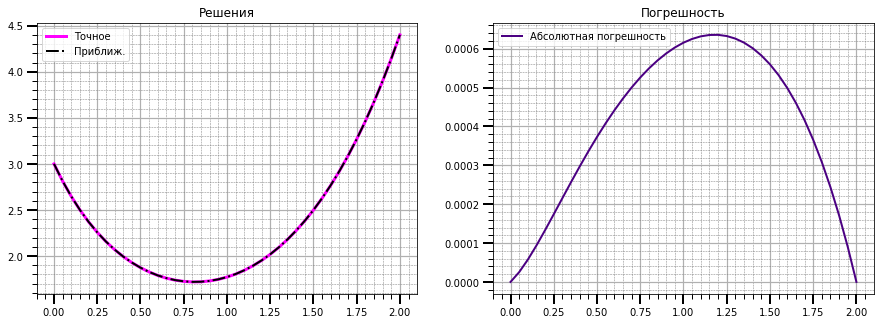

In [4]:
x_data = np.linspace(xa,xb,int((xb-xa)/h_)+1) 
fig,axs = plt.subplots(1,2,figsize =(15, 5))
axs[0].plot(x_data,u_real, label ="Точное", color = "magenta", linewidth=3, zorder = 5)
axs[0].plot(x_data,u, label ="Приближ.",linestyle = '-.', color = "black", linewidth=2, zorder = 5)
axs[0].set_title('Решения')
axs[1].plot(x_data,err, label ="Абсолютная погрешность", color = "indigo", linewidth=2, zorder = 5)
axs[1].set_title('Погрешность')
#axs[1].set_yscale('log')

for i in range (2):
    axs[i].grid(which="major", linewidth=1.2)
    axs[i].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
    axs[i].tick_params(which='major', length=10, width=2)
    axs[i].tick_params(which='minor', length=5, width=1)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend()

## Задача 8.2

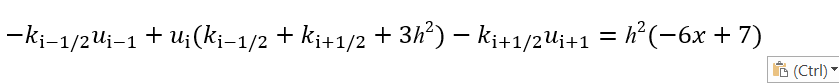

In [5]:
def k1(x): return 5
def k2(x): return 2**x
def k3(x): return 6*x+7
    
def k(x,conf):
    if (x >=0 and x <= 1): return conf[0](x)
    elif (x >1 and x <= 2): return conf[1](x)
    elif (x >2 and x <= 3): return conf[2](x)
    else: print("wrong x")

In [6]:
def A1(h,x,config): return -k(x-h/2,config)
def B1(h,x,config): return k(x-h/2,config)+k(x+h/2,config)+3*h*h
def C1(h,x,config): return -k(x+h/2,config)
def D1(h,x): return h*h*(-6*x+7)

def FindCoefs2(h,xa,xb,ua,ub,config):
    n = int((xb-xa)/h)
    x = np.linspace(xa,xb,n+1)
    d = D1(h,x)
    d[0] = ua
    d[-1] = ub
    a = np.zeros(x.size)
    b = np.zeros(x.size)
    c = np.zeros(x.size)
    for i in range(1,n):
        a[i] = A1(h,x[i],config)
        b[i] = B1(h,x[i],config)
        c[i] = C1(h,x[i],config)
    a[0] = c[0] = a[-1] = c[-1] = 0
    b[0] = b[-1] = 1
    return a,b,c,d

configs = np.array([[k1,k2,k3],[k1,k3,k2],[k2,k1,k3],[k2,k3,k1],[k3,k1,k2],[k3,k2,k1]])
x0 = 2.1 
xA, xB = 0, 3
uA, uB = 2, 12 
h_ = (xB - xA)/100



a_1,b_1,c_1,d_1 = FindCoefs2(h_,xA,xB,uA,uB,configs[0])
u1 = TDMA(a_1,b_1,c_1,d_1)

a_2,b_2,c_2,d_2 = FindCoefs2(h_,xA,xB,uA,uB,configs[1])
u2 = TDMA(a_2,b_2,c_2,d_2)

a_3,b_3,c_3,d_3 = FindCoefs2(h_,xA,xB,uA,uB,configs[2])
u3 = TDMA(a_3,b_3,c_3,d_3)

a_4,b_4,c_4,d_4 = FindCoefs2(h_,xA,xB,uA,uB,configs[3])
u4 = TDMA(a_4,b_4,c_4,d_4)

a_5,b_5,c_5,d_5 = FindCoefs2(h_,xA,xB,uA,uB,configs[4])
u5 = TDMA(a_5,b_5,c_5,d_5)

a_6,b_6,c_6,d_6 = FindCoefs2(h_,xA,xB,uA,uB,configs[5])
u6 = TDMA(a_6,b_6,c_6,d_6)

### Графики

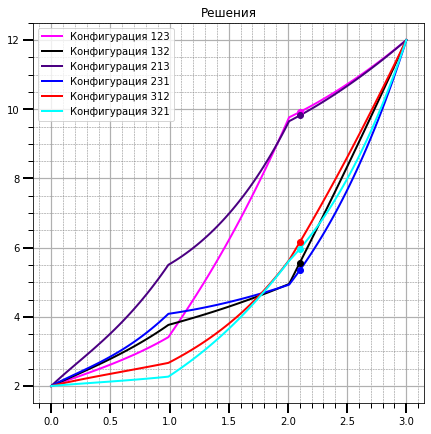

In [16]:
x_data = np.linspace(xA,xB,int((xB-xA)/h_)+1) 
fig,axs = plt.subplots(1,1,figsize =(7, 7))
axs.scatter(x0, u1[np.where(x_data==x0)], color = "magenta", zorder = 6)
axs.scatter(x0, u2[np.where(x_data==x0)], color = "black", zorder = 6)
axs.scatter(x0, u3[np.where(x_data==x0)], color = "indigo", zorder = 6)
axs.scatter(x0, u4[np.where(x_data==x0)], color = "blue", zorder = 6)
axs.scatter(x0, u5[np.where(x_data==x0)], color = "red", zorder = 6)
axs.scatter(x0, u6[np.where(x_data==x0)], color = "cyan", zorder = 6)
axs.plot(x_data,u1, label ="Конфигурация 123", color = "magenta", linewidth=2, zorder = 5)
axs.plot(x_data,u2, label ="Конфигурация 132", color = "black", linewidth=2, zorder = 5)
axs.plot(x_data,u3, label ="Конфигурация 213", color = "indigo", linewidth=2, zorder = 5)
axs.plot(x_data,u4, label ="Конфигурация 231", color = "blue", linewidth=2, zorder = 5)
axs.plot(x_data,u5, label ="Конфигурация 312", color = "red", linewidth=2, zorder = 5)
axs.plot(x_data,u6, label ="Конфигурация 321", color = "cyan", linewidth=2, zorder = 5)


axs.set_title('Решения')


axs.grid(which="major", linewidth=1.2)
axs.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs.tick_params(which='major', length=10, width=2)
axs.tick_params(which='minor', length=5, width=1)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())

axs.legend()